In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from wand.image import Image
import cv2
from enum import Enum

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [12]:
mpl.style.library

{'_mpl-gallery-nogrid': RcParams({'axes.axisbelow': True,
           'axes.grid': False,
           'figure.figsize': [2.0, 2.0],
           'figure.subplot.bottom': 0.01,
           'figure.subplot.left': 0.01,
           'figure.subplot.right': 0.99,
           'figure.subplot.top': 0.99,
           'image.cmap': 'Blues',
           'xtick.major.size': 0.0,
           'ytick.major.size': 0.0}),
 'seaborn-pastel': RcParams({'axes.prop_cycle': cycler('color', ['#92C6FF', '#97F0AA', '#FF9F9A', '#D0BBFF', '#FFFEA3', '#B0E0E6']),
           'patch.facecolor': '#92C6FF'}),
 'grayscale': RcParams({'axes.edgecolor': 'black',
           'axes.facecolor': 'white',
           'axes.labelcolor': 'black',
           'axes.prop_cycle': cycler('color', ['0.00', '0.40', '0.60', '0.70']),
           'figure.edgecolor': 'white',
           'figure.facecolor': '0.75',
           'grid.color': 'black',
           'image.cmap': 'gray',
           'lines.color': 'black',
           'patch.edgecolor': 'bla

In [3]:
class PlotKind(Enum):
    LinesComparison = 0
    Polynoms = 1
    Scatter = 2


# mpl_style
# predef_prop_cycle
# random_prop_cycle
# line width
# line style
# bg_color
# axes_color
# labels_color
# ticks_color
# grid color
# legend edge color
# legend alpha

num_plots = 2 # [2, 8]


(600, 800, 3)

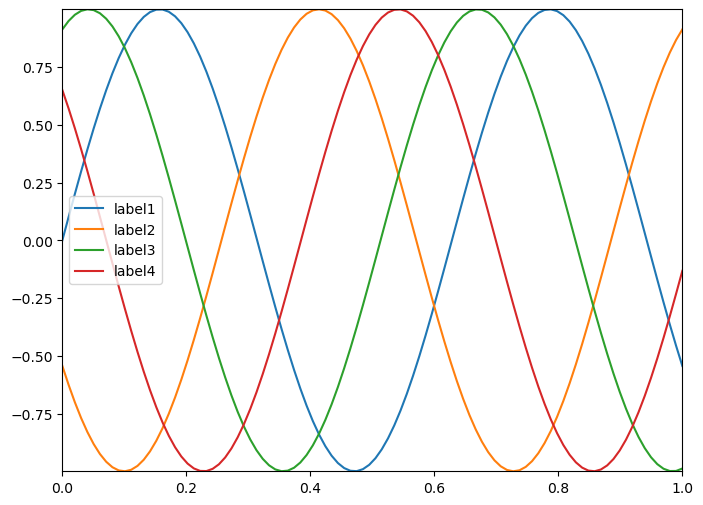

In [4]:
# antialiased = True
# mpl.rcParams['text.antialiased'] = antialiased
# text_color = (0,0,1,1)
# mpl.rcParams['text.color'] = text_color
# mpl.rcParams['axes.labelcolor'] = text_color
# mpl.rcParams['xtick.color'] = text_color
# mpl.rcParams['ytick.color'] = text_color
# mpl.rcParams['grid.color'] = text_color
# mpl.rcParams['axes.edgecolor'] = text_color
# mpl.rcParams['legend.edgecolor'] = text_color
# mpl.rcParams['legend.framealpha'] = 1

mpl.style.use('default')
#mpl.style.use('tableau-colorblind10')

x = np.linspace(0, 1, 100)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
#fig.tight_layout(pad=1)
ax.margins(0)
ax.plot(x, np.sin(x*10.0), label="label1")
ax.plot(x, np.sin((x+1.0)*10.0), label="label2")
ax.plot(x, np.sin((x+2.0)*10.0), label="label3")
ax.plot(x, np.sin((x+1.5)*10.0), label="label4")
leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(1.5)

fig.canvas.draw()
image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
image_from_plot = image_from_plot.reshape(fig.canvas.get_width_height()[::-1] + (3,))
display(image_from_plot.shape)

fig.savefig("test-aliased-agg.png", backend='agg')
fig.savefig("test-aliased-cairo.png", backend='cairo')
# im = Image(filename="test-aliased.pdf")
# im.antialias = False
# im.convert('png')
# im.antialias = False
# im.save(filename='test-aliased.png')

# fig.savefig("test-antialiased-cairo.png", backend='cairo')
# fig.savefig("test-antialiased-agg.png", backend='agg')

In [5]:
# cv2.imshow("image_from_plot", image_from_plot)
# cv2.waitKey(0)